In [1]:
import re

import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.model_selection import cross_val_predict

/home/tulio/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
dataset = pd.read_csv(r'/home/tulio/Documents/UFU/ORI/reforma_previdencia_rotulado.csv',sep=';')

In [3]:
dataset.describe()

,Tweet,Classificação
count,2232,2232
unique,2217,3
top,Fica fácil votar uma reforma da Previdência qu...,Neutro
freq,4,780


In [4]:
dataset.count()

Tweet            2232
Classificação    2232
dtype: int64

In [5]:
dataset["Classificação"].value_counts()

Neutro      780
Positivo    740
Negativo    712
Name: Classificação, dtype: int64

In [6]:
tweets, sentimentos = dataset['Tweet'], dataset['Classificação']

In [14]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)

In [15]:
model = MultinomialNB()
model.fit(freq_tweets, sentimentos)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
testes = [
    "Reforma da Previdência é uma uma emenda constitucional", # Neutro
    "Essa reforma da previdência é uma coisa imunda", # Negativo
    "A reforma da previdência será modificada pra economizar menos", # Neutro
    "Só irei aposentar no caixão", # Negativo
    "Isso é regime de escravidão o que essa reforma propões" # Negativo
]
print(testes)

['Reforma da Previdência é uma uma emenda constitucional', 'Essa reforma da previdência é uma coisa imunda', 'A reforma da previdência será modificada pra economizar menos', 'Só irei aposentar no caixão', 'Isso é regime de escravidão o que essa reforma propões']


In [17]:
freq_testes = vectorizer.transform(testes)

In [18]:
model.predict(freq_testes)

array(['Neutro', 'Negativo', 'Negativo', 'Negativo', 'Negativo'],
      dtype='<U8')

In [19]:
resultados = cross_val_predict(model, freq_tweets, sentimentos, cv=10)

In [20]:
metrics.accuracy_score(sentimentos, resultados)

0.6097670250896058

In [21]:
print(metrics.classification_report(sentimentos, resultados))

              precision    recall  f1-score   support

    Negativo       0.59      0.58      0.58       712
      Neutro       0.68      0.56      0.62       780
    Positivo       0.58      0.69      0.63       740

    accuracy                           0.61      2232
   macro avg       0.61      0.61      0.61      2232
weighted avg       0.62      0.61      0.61      2232



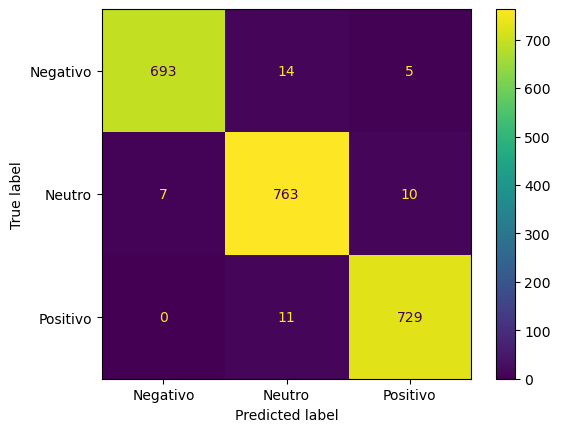

In [23]:
confusion_matrix = metrics.plot_confusion_matrix(model,X=freq_tweets,y_true=sentimentos,values_format='.4g')

## Resultado

Pendente.